In [1]:
from simulation import *

# solver simulation

In [2]:
df_all_words = pd.read_pickle('data/df_all_words_entropy.pickle')
all_next_guess = pickle.load(open('data/next_guess_map.pickle', 'rb'))

df_answer = df_all_words[df_all_words['in_answers'] == True]
all_patterns = generate_all_patterns()

In [3]:
play(optimal_guess=False)

注音dle: ㄌㄧㄡㄌㄧ 流利/流離

#1 guess:
ㄉ  ㄚ  ㄋ  ㄧ  ㄤ 大娘
⬛️ ⬛️ ⬛️ 🟨 ⬛️

#2 guess:
ㄒ  ㄧ  ㄥ  ㄨ  ㄣ 行文/刑問
⬛️ 🟩 ⬛️ ⬛️ ⬛️

#3 guess:
ㄐ  ㄧ  ㄢ  ㄌ  ㄧ 建立/見禮
⬛️ 🟩 ⬛️ 🟩 🟩

#4 guess:
ㄊ  ㄧ  ㄠ  ㄌ  ㄧ 條例/條理
⬛️ 🟩 ⬛️ 🟩 🟩

#5 guess:
ㄌ  ㄧ  ㄡ  ㄌ  ㄧ 流利/流離
🟩 🟩 🟩 🟩 🟩

solved! attempt = 5


5

# test all

In [43]:
from joblib import Parallel, delayed
import multiprocessing

import collections
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

In [15]:
def play_all_answers(first_guess, to_print=False, show_zh=False):
    attempts = list()
    for answer in df_answer['zhuyin']:
        num_attempt = play(first_guess=first_guess, answer=answer,
                           to_print=to_print, show_zh=show_zh)
        attempts.append(num_attempt)
    return sum(attempts)/len(attempts), attempts


def play_all_possible_words_by_seq(to_print=False, show_zh=False):
    best = {'word': '', 'avg_attempt': 100}
    with tqdm(total=len(df_all_words)) as pbar:
        for word in df_all_words['zhuyin']:
            pbar.update(1)
            avg, dist = play_all_answers(
                first_guess=word, to_print=to_print, show_zh=show_zh)

            if avg < best['avg_attempt']:
                best['word'] = word
                best['avg_attempt'] = avg

            pbar.set_description(
                f"{word}-{avg:.3f}, {best['word']}-{best['avg_attempt']:.3f}")

    print(f"best first guess: {best['word']} {best['avg_attempt']}")


def play_all_possible_words(to_print=False, show_zh=False):
    def play_word(word):
        avg, dist = play_all_answers(first_guess=word)
        return avg, dist

    word_list = list(df_all_words['zhuyin'])
    results = Parallel(n_jobs=8, verbose=10)(
        delayed(play_word)(word) for word in word_list)

    return results

In [46]:
res = play_all_possible_words()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   10.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   17.8s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   25.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   34.6s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   44.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   55.5s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(

[Parallel(n_jobs=8)]: Done 9506 tasks      | elapsed: 176.8min
[Parallel(n_jobs=8)]: Done 9645 tasks      | elapsed: 179.4min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed: 182.1min
[Parallel(n_jobs=8)]: Done 9925 tasks      | elapsed: 184.7min
[Parallel(n_jobs=8)]: Done 10066 tasks      | elapsed: 187.3min
[Parallel(n_jobs=8)]: Done 10209 tasks      | elapsed: 190.0min
[Parallel(n_jobs=8)]: Done 10352 tasks      | elapsed: 192.7min
[Parallel(n_jobs=8)]: Done 10497 tasks      | elapsed: 195.3min
[Parallel(n_jobs=8)]: Done 10642 tasks      | elapsed: 198.0min
[Parallel(n_jobs=8)]: Done 10789 tasks      | elapsed: 200.8min
[Parallel(n_jobs=8)]: Done 10936 tasks      | elapsed: 203.6min
[Parallel(n_jobs=8)]: Done 11085 tasks      | elapsed: 206.4min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed: 209.2min
[Parallel(n_jobs=8)]: Done 11385 tasks      | elapsed: 212.0min
[Parallel(n_jobs=8)]: Done 11536 tasks      | elapsed: 214.8min
[Parallel(n_jobs=8)]: Done 11689 tasks      

In [55]:
with open("play_all_result.pickle", "wb") as po:
    pickle.dump(res, po)

## view result

In [3]:
with open("play_all_result.pickle", "rb") as po:
    guess_result = pickle.load(po)
len(guess_result)

21721

In [52]:
avg_guess = np.ones(21721)
for i, res in enumerate(guess_result):
    avg_guess[i] = res[0]

print('average attempts:\t', sum(avg_guess)/len(avg_guess))
print('minimum attempts:\t', min(avg_guess))
print('index of min attempts:\t', np.argmin(avg_guess))

average attempts:	 4.220808522341212
minimum attempts:	 3.9337539432176656
index of min attempts:	 4218


In [48]:
def top_k_best(k):
    ind_top = avg_guess.argsort()[:k]
    result = list()
    for ind in ind_top:
        result.append([ind, df_all_words.loc[ind, 'zhuyin'],
                       df_all_words.loc[ind, 'words'], avg_guess[ind]])
    df_top = pd.DataFrame(result, index=range(
        k+1)[1:], columns=['id', 'zhuyin', 'word', 'avg_guess'])
    return df_top

In [49]:
df_topk = top_k_best(10)
df_topk

,id,zhuyin,word,avg_guess
1,4218,ㄉㄥㄌㄨㄣ,等倫,3.933754
2,495,ㄅㄢㄉㄨㄣ,半蹲,3.945321
3,20790,ㄧㄥㄉㄨㄣ,英噸,3.953733
4,10388,ㄏㄢㄉㄨㄣ,撼頓,3.956887
5,15341,ㄓㄣㄉㄨㄢ,診斷,3.961094
6,17417,ㄕㄣㄉㄨㄢ,身段/審斷,3.962145
7,4109,ㄉㄢㄌㄨㄣ,丹輪,3.963197
8,4995,ㄉㄨㄥㄕㄣ,動身,3.970557
9,4490,ㄉㄧㄢㄊㄤ,殿堂/點湯,3.971609
10,3243,ㄈㄣㄉㄨㄢ,分段,3.971609


## visualize result

In [75]:
def draw_bar_chart(word, scores):
    
    print(f'\n注音dle: using "{word}" as the first guess')
    
    counts = collections.Counter(sorted(scores))

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    tries = counts.keys()
    y_pos = np.arange(len(tries))
    times = counts.values()

    ax.barh(y_pos, times, align='center', color=[
            '#6AA964' for _ in range(5)]+['#C5B565' for _ in range(3)])
    ax.set_yticks(y_pos, labels=tries)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('counts')
    ax.set_ylabel('number of attempts')
    ax.set_title(f'performance distribution')
    ax.bar_label(ax.containers[0])

    plt.show()

#1

注音dle: using "ㄉㄥㄌㄨㄣ" as the first guess


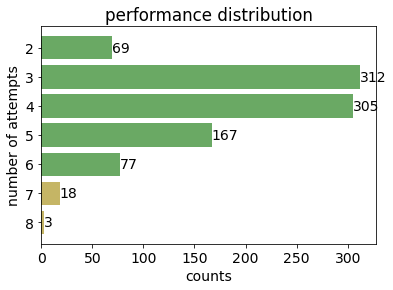

#2

注音dle: using "ㄅㄢㄉㄨㄣ" as the first guess


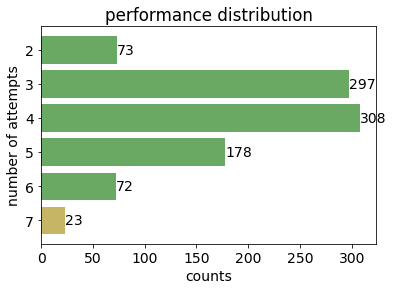

#3

注音dle: using "ㄧㄥㄉㄨㄣ" as the first guess


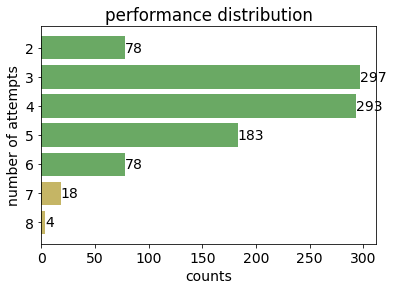

#4

注音dle: using "ㄏㄢㄉㄨㄣ" as the first guess


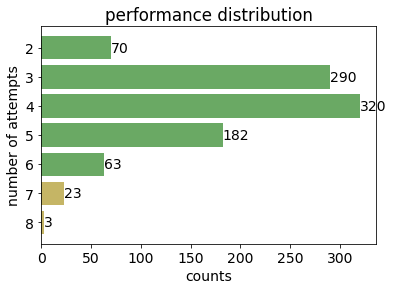

#5

注音dle: using "ㄓㄣㄉㄨㄢ" as the first guess


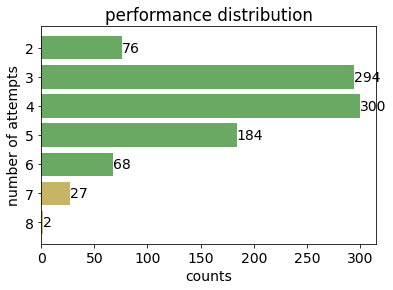

#6

注音dle: using "ㄕㄣㄉㄨㄢ" as the first guess


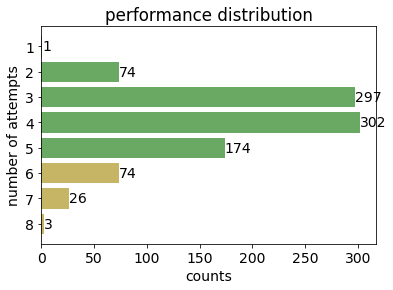

#7

注音dle: using "ㄉㄢㄌㄨㄣ" as the first guess


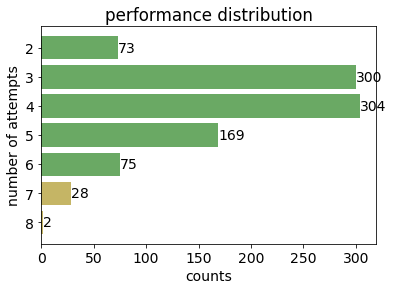

#8

注音dle: using "ㄉㄨㄥㄕㄣ" as the first guess


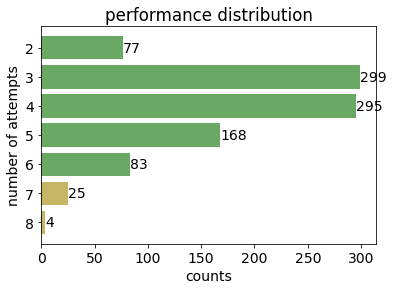

#9

注音dle: using "ㄉㄧㄢㄊㄤ" as the first guess


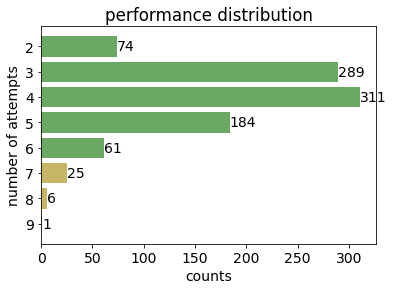

#10

注音dle: using "ㄈㄣㄉㄨㄢ" as the first guess


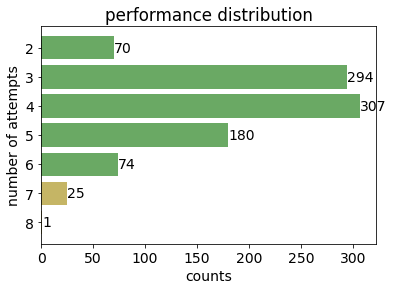

In [78]:
for i, row in df_topk.iterrows():
    print(f'#{i}')
    draw_bar_chart(row['zhuyin'], guess_result[row['id']][1])